<div class='alert alert-box alert-info'>
    <b>I. Importing necessary Libraries </b>

In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

***
<div class='alert alert-box alert-info'>
    <b>II. Importing dataset </b>

In [118]:
df = pd.read_csv("database_IND.csv")
df

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,...,2019.0,NaN,617.789264,843.747000,886.004428,663.774500,626.239128,NaN,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,...,2019.0,NaN,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,NaN,Central Electricity Authority,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,IND,India,YERMARUS TPP,IND0000513,1600.0,16.2949,77.3568,Coal,Oil,NaN,...,2019.0,NaN,NaN,0.994875,233.596650,865.400000,686.500000,NaN,Central Electricity Authority,NaN
903,IND,India,Yelesandra Solar Power Plant,WRI1026222,3.0,12.8932,78.1654,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
904,IND,India,Yelisirur wind power project,WRI1026776,25.5,15.2758,75.5811,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
905,IND,India,ZAWAR MINES,WRI1019901,80.0,24.3500,73.7477,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


***
<div class='alert alert-box alert-info'>
    <b>III. Data Reading </b>

In [3]:
# printing the unique values for all columns
for i in df:
    print ('-'*50,'\n',df[i].value_counts())

-------------------------------------------------- 
 IND    907
Name: country, dtype: int64
-------------------------------------------------- 
 India    907
Name: country_long, dtype: int64
-------------------------------------------------- 
 ACME Solar Tower           1
RAICHUR                    1
PRYAGRAJ (BARA) TPP        1
PULICHINTALA               1
PUNE MILL                  1
                          ..
KADANA                     1
KADRA                      1
KAHALGAON                  1
KAIGA                      1
iEnergy Theni Wind Farm    1
Name: name, Length: 907, dtype: int64
-------------------------------------------------- 
 WRI1020239    1
IND0000356    1
IND0000346    1
IND0000523    1
WRI1019978    1
             ..
IND0000167    1
IND0000168    1
IND0000169    1
IND0000170    1
WRI1026761    1
Name: gppd_idnr, Length: 907, dtype: int64
-------------------------------------------------- 
 5.0       39
10.0      22
600.0     20
15.0      20
1200.0    19
         

__dropping the following columns__
- `other_fuel3` has no values
- `wepp_id` has no values
- `generation_gwh_2013` has no values
- `generation_gwh_2019` has no values
- `estimated_generation_gwh` has no values

In [4]:
# checking datatypes of columns and looking for null values
df.dtypes

country                      object
country_long                 object
name                         object
gppd_idnr                    object
capacity_mw                 float64
latitude                    float64
longitude                   float64
primary_fuel                 object
other_fuel1                  object
other_fuel2                  object
other_fuel3                 float64
commissioning_year          float64
owner                        object
source                       object
url                          object
geolocation_source           object
wepp_id                     float64
year_of_capacity_data       float64
generation_gwh_2013         float64
generation_gwh_2014         float64
generation_gwh_2015         float64
generation_gwh_2016         float64
generation_gwh_2017         float64
generation_gwh_2018         float64
generation_gwh_2019         float64
generation_data_source       object
estimated_generation_gwh    float64
dtype: object

__Datatypes:__
- `float64`(10)
- `object`(7)

In [5]:
df.isnull().sum()

country                       0
country_long                  0
name                          0
gppd_idnr                     0
capacity_mw                   0
latitude                     46
longitude                    46
primary_fuel                  0
other_fuel1                 709
other_fuel2                 906
other_fuel3                 907
commissioning_year          380
owner                       565
source                        0
url                           0
geolocation_source           19
wepp_id                     907
year_of_capacity_data       388
generation_gwh_2013         907
generation_gwh_2014         509
generation_gwh_2015         485
generation_gwh_2016         473
generation_gwh_2017         467
generation_gwh_2018         459
generation_gwh_2019         907
generation_data_source      458
estimated_generation_gwh    907
dtype: int64

__Null Values:__
1. Fill the latitude, longitude and year_of_capacity_data columns with __mean()__.
2. Fill the following columns using __machine learning model__.
    1. `generation_gwh_2014` 
    2. `generation_gwh_2015`
    3. `generation_gwh_2016`
    4. `generation_gwh_2017`
    5. `generation_gwh_2018` 


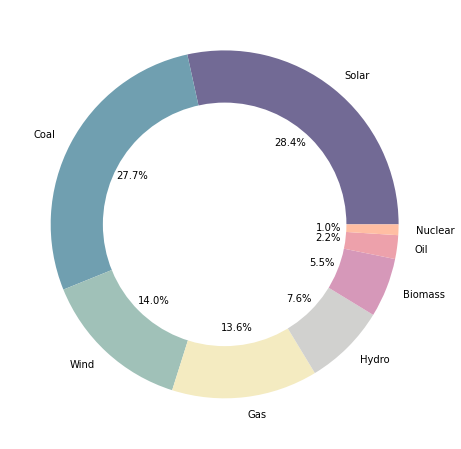

In [6]:
#observing the unique values in the 'primary_fuel' column

plt.figure(figsize=(8,8))
plt.pie(df['primary_fuel'].value_counts(),autopct='%1.1f%%',labels=df['primary_fuel'].unique(),
        colors=['#726A95','#709FB0','#A0C1B8','#F4EBC1','#D1D1CF','#D698B9','#EDA1AB','#FFBEA3'])
centre = plt.Circle((0,0),0.7,fc='white')
plt.gca().add_artist(centre)
plt.show()

***
<div class='alert alert-box alert-info'>
    <b>IV. Data Cleaning </b>

In [119]:
# dropping the columns, because they have no values or one value (as seen in the 'otherfuel2' column)
df.drop(df[['other_fuel2','other_fuel3','wepp_id','generation_gwh_2013','generation_gwh_2019','estimated_generation_gwh']],axis=1,inplace=True)

# we can remove the source, url columns because they're just information on how the powerplant data was obtained
df.drop(df[['source','geolocation_source','generation_data_source','url']],axis=1,inplace=True)

#dropping 'other_fuel1' and 'owner' since it has many missing values
df.drop(df[['other_fuel1','owner']],axis=1,inplace=True)

# replacing missing values
df['latitude'].fillna(df['latitude'].mean(),inplace=True) #using mean to fill latitude values
df['longitude'].fillna(df['longitude'].mean(),inplace=True) #using mean to fill longitude values

#using mode to fill 'year_of_capacity_data' values
df['year_of_capacity_data'].fillna(df['year_of_capacity_data'].mean(),inplace=True) 

# using linear interpolation to fill the 'commissioning_year' values
df['commissioning_year'].interpolate(method='linear',inplace=True) 
#since it is an 'year' column and it is not supposed to have .333 or .666 as decimals, setting the datatype as int and then to float to reset the decimals
df['commissioning_year'] = df['commissioning_year'].astype('int') 

> <div class='alert alert-box alert-warning'>
     <b>IV (a). Creating machine learning model to fill the 'generation_gwh_2018' column <b>

In [141]:
# creating a new dataframe with no null values 

df_notnan = df[['country', 'country_long', 'name', "gppd_idnr",'capacity_mw','latitude', 'longitude', 'primary_fuel',
                'commissioning_year','generation_gwh_2014', 'generation_gwh_2015',
                'generation_gwh_2016','generation_gwh_2017','generation_gwh_2018']].dropna()
df_notnan

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,2004,617.789264,843.74700,886.004428,663.774500,626.239128
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,2015,3035.550000,5916.37000,6243.000000,5385.579736,7279.000000
5,IND,India,AKRIMOTA LIG,IND0000003,250.0,23.7689,68.6447,Coal,2005,1153.421000,1208.85200,1175.765000,1147.913000,976.655000
6,IND,India,ALIYAR,IND0000004,60.0,10.4547,77.0078,Hydro,1970,157.558250,152.19520,61.421350,89.629600,48.327150
7,IND,India,ALLAIN DUHANGAN,IND0000005,192.0,32.2258,77.2070,Hydro,2010,674.391100,721.33520,675.724400,679.594950,579.318850
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
882,IND,India,VISHNU PRAYAG,IND0000505,400.0,30.5669,79.5468,Hydro,2006,1806.860300,1204.59675,2031.839750,2150.095500,1922.359900
889,IND,India,WANAKBORI,IND0000507,1470.0,22.8725,73.3588,Coal,1986,6753.870000,5161.53800,3539.630000,7018.217000,7582.300000
890,IND,India,WARDHA WARORA(Sai Wardha Power),IND0000508,540.0,20.2727,78.9792,Coal,2010,1045.820000,1651.15890,1229.480000,999.170000,940.390000
893,IND,India,WY.CANAL A -D,IND0000510,62.4,30.3033,77.5684,Hydro,1991,184.453100,183.00000,204.253600,175.866250,236.491600


In [142]:
# seperating into train and test

x_train = df_notnan[['country', 'country_long', 'name', "gppd_idnr",'capacity_mw','latitude', 'longitude', 'primary_fuel',
              'commissioning_year', 'generation_gwh_2014','generation_gwh_2015', 'generation_gwh_2016','generation_gwh_2017']]
y_train =  df_notnan['generation_gwh_2018']

In [143]:
# applying label encoder to columns with 'Object' datatype

from sklearn.preprocessing import LabelEncoder

for i in x_train:
    if x_train[i].dtypes=='O':
        x_train[i] = LabelEncoder().fit_transform(x_train[i].values)

x_train.head(3)

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017
3,0,0,0,0,135.0,23.8712,91.3602,1,2004,617.789264,843.747,886.004428,663.774500
4,0,0,1,1,1800.0,21.9603,82.4091,0,2015,3035.550000,5916.370,6243.000000,5385.579736
5,0,0,2,2,250.0,23.7689,68.6447,0,2005,1153.421000,1208.852,1175.765000,1147.913000


In [144]:
# standardizing the training dataset

from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
x_train_scaled = ss.fit_transform(x_train)
print ("Mean:",x_train_scaled.mean(),"\nSTD:",x_train_scaled.std())

Mean: -1.9989693333404352e-16 
STD: 0.9198662110077999


In [145]:
# fitting the linear regression dataset

from sklearn.linear_model import LinearRegression
lreg = LinearRegression().fit(x_train_scaled,y_train)

In [146]:
#creating x_test
x_test = df[['country', 'country_long', 'name', "gppd_idnr",'capacity_mw','latitude', 'longitude', 'primary_fuel','commissioning_year',
             'generation_gwh_2014','generation_gwh_2015', 'generation_gwh_2016','generation_gwh_2017']].dropna()

#label encoding the object columns in the test dataset
for i in x_test:
    if x_test[i].dtypes=='O':
        x_test[i] = LabelEncoder().fit_transform(x_test[i].values)
        
#applying standardscaler on test data
x_test_scaled = ss.fit_transform(x_test)

# predicting the target ('generation_gwh_2018')
y_pred = lreg.predict(x_test_scaled)

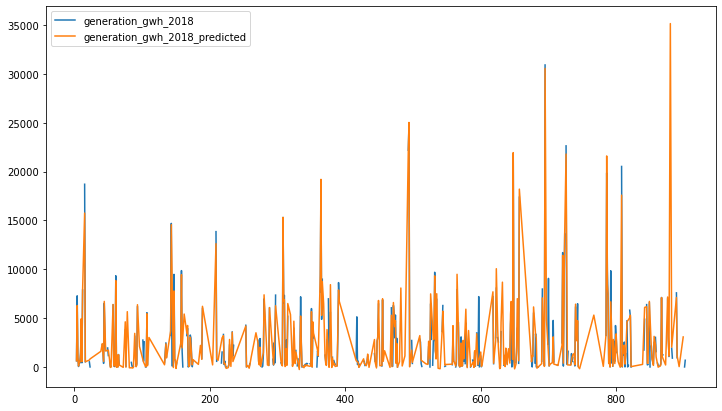

In [147]:
# plotting the generation_gwh_2018_predicted data vs generation_gwh_2018

fig , ax = plt.subplots(figsize=(12,7),sharex=True,sharey=True) #setting figuresize and subplot by making the plots share x & y
ax.plot(df.index,df['generation_gwh_2018'],label='generation_gwh_2018') #plots the actual values
ax.plot(x_test.index,y_pred,label='generation_gwh_2018_predicted') #plots the predicted values
plt.legend() 
plt.show()

In [176]:
# creating a new dataframe and label encoding all 'object' columns
df_new = df.copy()
for o in df_new:
    if df_new[o].dtypes=='O':
        df_new[o] = LabelEncoder().fit_transform(df_new[o].values)

In [177]:
#create a new column 
df_new['generation_gwh_2018_predicted'] = 0

# Fill the null values in the original dataframe with predicted values
for index, row in df_new.iterrows():
    if np.isnan(row['generation_gwh_2018']) and ~np.isnan(row['generation_gwh_2014']) and ~np.isnan(row['generation_gwh_2015']) and ~np.isnan(row['generation_gwh_2016']) and ~np.isnan(row['generation_gwh_2017']):
        rowScaled = ss.transform([[row['country'], row['country_long'], row['name'], row["gppd_idnr"],row['capacity_mw'],row['latitude'],
                                   row['longitude'], row['primary_fuel'],row['commissioning_year'],row['generation_gwh_2014'],row['year_of_capacity_data'],
                                   row['generation_gwh_2015'],row['generation_gwh_2016'],row['generation_gwh_2017']]])
        df_new.iloc[index,['generation_gwh_2018_predicted']] = lreg.predict(rowScaled)
    elif ~np.isnan(row['generation_gwh_2018']):
                                  df_new.loc[index,['generation_gwh_2018_predicted']] = row['generation_gwh_2018']
    else:
                                  row['generation_gwh_2018_predicted'] = np.nan

> <div class='alert alert-box alert-warning'>
     <b>IV (b). Creating machine learning model to fill the 'generation_gwh_2014' column <b>

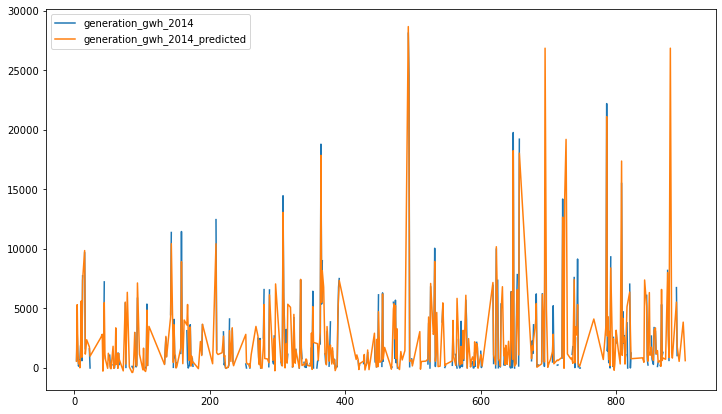

In [150]:
# seperating into train and test

x_train = df_notnan[['country', 'country_long', 'name', "gppd_idnr",'capacity_mw','latitude', 'longitude', 'primary_fuel',
              'commissioning_year','generation_gwh_2015', 'generation_gwh_2016','generation_gwh_2017', 'generation_gwh_2018']]
y_train =  df_notnan['generation_gwh_2014']

# using LabelEncoder 

for i in x_train:
    if x_train[i].dtypes=='O':
        x_train[i] = LabelEncoder().fit_transform(x_train[i].values)

# Standardizing the training dataset using StandardScaler
x_train_scaled = ss.fit_transform(x_train)

# fitting the train and test data to the model
lreg = LinearRegression().fit(x_train_scaled,y_train)

#creating x_test
x_test = df[['country', 'country_long', 'name', "gppd_idnr",'capacity_mw','latitude', 'longitude', 'primary_fuel','commissioning_year',
             'generation_gwh_2015', 'generation_gwh_2016','generation_gwh_2017','generation_gwh_2018']].dropna()

#label encoding the object columns in the test dataset
for i in x_test:
    if x_test[i].dtypes=='O':
        x_test[i] = LabelEncoder().fit_transform(x_test[i].values)
        
#applying standardscaler on test data
x_test_scaled = ss.fit_transform(x_test)

# predicting the target ('generation_gwh_2018')
y_pred = lreg.predict(x_test_scaled)

# plotting the generation_gwh_2018_predicted data vs generation_gwh_2018

fig , ax = plt.subplots(figsize=(12,7),sharex=True,sharey=True) #setting figuresize and subplot by making the plots share x & y
ax.plot(df.index,df['generation_gwh_2014'],label='generation_gwh_2014') #plots the actual values
ax.plot(x_test.index,y_pred,label='generation_gwh_2014_predicted') #plots the predicted values
plt.legend() 
plt.show()

In [153]:
#create a new column 
df_new['generation_gwh_2014_predicted'] = 0

# Fill the null values in the original dataframe with predicted values
for index, row in df_new.iterrows():
    if np.isnan(row['generation_gwh_2014']) and ~np.isnan(row['generation_gwh_2018']) and ~np.isnan(row['generation_gwh_2015']) and ~np.isnan(row['generation_gwh_2016']) and ~np.isnan(row['generation_gwh_2017']):
        rowScaled_2014 = ss.transform([[row['country'], row['country_long'], row['name'], row["gppd_idnr"],row['capacity_mw'],row['latitude'],
                                        row['longitude'], row['primary_fuel'],row['commissioning_year'],row['generation_gwh_2015'],
                                        row['generation_gwh_2016'],row['generation_gwh_2017'],row['generation_gwh_2018']]])
        df_new.iloc[index,['generation_gwh_2014_predicted']] = lreg.predict(rowScaled_2014)
    elif ~np.isnan(row['generation_gwh_2014']):
        df_new.loc[index,['generation_gwh_2014_predicted']] = row['generation_gwh_2014']
    else:
        row['generation_gwh_2014_predicted'] = np.nan

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

***
<div class='alert alert-box alert-info'>
    <b> Model Creation </b>

In [178]:
x = df.drop('capacity_mw',axis=1)
y = df['capacity_mw']

In [179]:
from sklearn.preprocessing import power_transform
StandardScaler().fit_transform(x)
x = power_transform(x,method='yeo-johnson')

ValueError: could not convert string to float: 'IND'

In [ ]:
from sklearn.model_selection import train_test_split,GridSearchCV

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=8)

In [ ]:
R2 ,MSE ,MAE ,RMSE ,CV ,accuracy ,model_name = [],[],[],[],[],[],[]
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor,GradientBoostingRegressor 
from sklearn.svm import SVR 
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.neighbors import KNeighborsRegressor 
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score

rfr= RandomForestRegressor()
ada= AdaBoostRegressor()
gbr=GradientBoostingRegressor()
lr=LinearRegression()
L=Lasso()
R = Ridge()
knr = KNeighborsRegressor()
svr = SVR()
models = {'RandomForestRegression':rfr,'SupportVectorRegression':svr, 
          'ADABoostRegression':ada,'KNeighborsRegression':knr,
          'GradientBoostingRegression':gbr,'LinearRegression':lr,
          'Lasso':L,'Ridge':R}

for i in models.keys():
    model = models[i]
    model.fit(x_train,y_train)
    y_pred = model.predict(x_test)
    test_score = model.score(x_test,y_test)
    cv_score = cross_val_score(models[i],x,y).mean()
    mae = mean_absolute_error(y_test,y_pred)
    mse = mean_squared_error(y_test,y_pred)
    rmse = mean_squared_error(y_test,y_pred,squared=False)
    R2_S = r2_score(y_test,y_pred)
    print('-'*50)
    print("Model:",i)
    model_name.append(i)
    print("Accuracy:",round(test_score*100,2))
    accuracy.append(round(test_score*100,2))
    print("R2 Score:",round(R2_S*100,2))
    R2.append(round(R2_S*100,2))
    print("CV Score:",round(cv_score*100,2))
    CV.append(round(cv_score*100,2))
    print("MAE:",mae)
    MAE.append(mae)
    print("MSE:",mse)
    MSE.append(mse)
    print("RMSE:",rmse)
    RMSE.append(rmse)

In [ ]:
capacity_df = pd.DataFrame({'Model':model_name,'Accuracy':accuracy,'CV Score':CV,'R2 Score':R2,'MSE':MSE,
                        'RMSE':RMSE,'MAE':MAE})
capacity_df.sort_values(by='MAE',ascending=True)